In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Указание путей

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Количество классов
если не изменить переменную в соответствии с количеством классов в выборке, будет ошибка

In [3]:
NUM_CLASSES = 6

# Считывание датасета

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Построение модели
мы будем использовать небольшую полносвязную нейронную сеть с softmax в конце для предсказания вероятностей

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Сallback чекпоинтов модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback для ранней остановки
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# настройки обучения
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 9s - loss: 2.0387 - accuracy: 0.2109
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 1s 7ms/step - loss: 1.8752 - accuracy: 0.2493 - val_loss: 1.7104 - val_accuracy: 0.3127
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.8056 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 1.7097 - accuracy: 0.2954 - val_loss: 1.5967 - val_accuracy: 0.3972
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.6677 - accuracy: 0.2500
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.5993 - accuracy: 0.3377 - val_loss: 1.4845 - val_accuracy: 0.4457
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.6111 - accuracy: 0.3047
E

 1/30 [>.............................] - ETA: 0s - loss: 0.9699 - accuracy: 0.6016
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.6634 - val_loss: 0.5608 - val_accuracy: 0.8452
Epoch 29/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.9274 - accuracy: 0.6406
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.6725 - val_loss: 0.5429 - val_accuracy: 0.8530
Epoch 30/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8764 - accuracy: 0.6406
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.6639 - val_loss: 0.5332 - val_accuracy: 0.8530
Epoch 31/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8621 - accuracy: 0.6406
Epoch 31

 1/30 [>.............................] - ETA: 0s - loss: 0.7618 - accuracy: 0.7344
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.7265 - val_loss: 0.3877 - val_accuracy: 0.9007
Epoch 56/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7175 - accuracy: 0.7422
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.7366 - val_loss: 0.3784 - val_accuracy: 0.8976
Epoch 57/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6754 - accuracy: 0.7500
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.7244 - val_loss: 0.3760 - val_accuracy: 0.9023
Epoch 58/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7128 - accuracy: 0.7188
Epoch 58

 1/30 [>.............................] - ETA: 0s - loss: 0.6390 - accuracy: 0.7500
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7677 - val_loss: 0.3095 - val_accuracy: 0.9218
Epoch 83/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6521 - accuracy: 0.7734
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.7541 - val_loss: 0.3080 - val_accuracy: 0.9234
Epoch 84/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7266
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7518 - val_loss: 0.3038 - val_accuracy: 0.9234
Epoch 85/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7062 - accuracy: 0.7969
Epoch 85

 1/30 [>.............................] - ETA: 0s - loss: 0.7187 - accuracy: 0.7188
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.7700 - val_loss: 0.2750 - val_accuracy: 0.9289
Epoch 110/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8047
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.7591 - val_loss: 0.2730 - val_accuracy: 0.9249
Epoch 111/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7030 - accuracy: 0.7344
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.7718 - val_loss: 0.2776 - val_accuracy: 0.9484
Epoch 112/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6556 - accuracy: 0.7422
Ep

Epoch 136/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7578
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7771 - val_loss: 0.2561 - val_accuracy: 0.9570
Epoch 137/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6108 - accuracy: 0.7578
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7867 - val_loss: 0.2467 - val_accuracy: 0.9539
Epoch 138/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5293 - accuracy: 0.8125
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7859 - val_loss: 0.2481 - val_accuracy: 0.9554
Epoch 139/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5041 - accu

Epoch 163/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6403 - accuracy: 0.7422
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7817 - val_loss: 0.2409 - val_accuracy: 0.9617
Epoch 164/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8281
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7828 - val_loss: 0.2497 - val_accuracy: 0.9484
Epoch 165/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8024 - accuracy: 0.7422
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7820 - val_loss: 0.2386 - val_accuracy: 0.9578
Epoch 166/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5835 - accu

Epoch 190/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4783 - accuracy: 0.8125
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7875 - val_loss: 0.2335 - val_accuracy: 0.9554
Epoch 191/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6472 - accuracy: 0.7188
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7825 - val_loss: 0.2329 - val_accuracy: 0.9578
Epoch 192/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5572 - accuracy: 0.7812
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7898 - val_loss: 0.2327 - val_accuracy: 0.9578
Epoch 193/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5738 - accu

Epoch 217/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6253 - accuracy: 0.8047
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7838 - val_loss: 0.2229 - val_accuracy: 0.9593
Epoch 218/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5159 - accuracy: 0.8125
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7932 - val_loss: 0.2297 - val_accuracy: 0.9547
Epoch 219/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6025 - accuracy: 0.8125
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7963 - val_loss: 0.2292 - val_accuracy: 0.9601
Epoch 220/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4487 - accu

Epoch 244/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4952 - accuracy: 0.7656
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7885 - val_loss: 0.2182 - val_accuracy: 0.9586
Epoch 245/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5831 - accuracy: 0.8281
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7984 - val_loss: 0.2223 - val_accuracy: 0.9601
Epoch 246/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7656
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8005 - val_loss: 0.2271 - val_accuracy: 0.9593
Epoch 247/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5557 - accu

Epoch 271/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6334 - accuracy: 0.7812
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7982 - val_loss: 0.2201 - val_accuracy: 0.9625
Epoch 272/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6586 - accuracy: 0.7734
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7984 - val_loss: 0.2233 - val_accuracy: 0.9593
Epoch 273/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4891 - accuracy: 0.7812
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8034 - val_loss: 0.2187 - val_accuracy: 0.9578
Epoch 274/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4547 - accu

In [12]:
# Качество модели
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 888us/step - loss: 0.2190 - accuracy: 0.9570


In [13]:
# Сохранение модели
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Заключительный тест
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.3931478e-01 6.0632549e-02 5.2545656e-05 1.8149768e-07 1.6466854e-11
 4.6477315e-11]
0


# Матрица корелляций

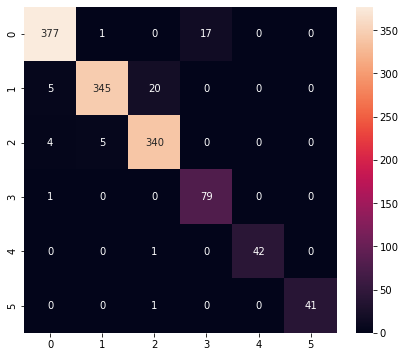

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       395
           1       0.98      0.93      0.96       370
           2       0.94      0.97      0.96       349
           3       0.82      0.99      0.90        80
           4       1.00      0.98      0.99        43
           5       1.00      0.98      0.99        42

    accuracy                           0.96      1279
   macro avg       0.95      0.97      0.96      1279
weighted avg       0.96      0.96      0.96      1279



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Конвертация модели в сжатый формат
Tensorflow-Lite

In [16]:
# Сохранение модели
model.save(model_save_path, include_optimizer=False)

In [17]:
# Преобразование модели (квантование)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\aalap\AppData\Local\Temp\tmp38nl4cic\assets


6496

# Заключительный тест

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Получить I / O тензор
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Имплементация
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.3931478e-01 6.0632564e-02 5.2545653e-05 1.8149785e-07 1.6466852e-11
 4.6477489e-11]
0
